In [36]:
import backtrader as bt
import yfinance as yf
import matplotlib.pyplot as plt

class RSISMAATRStrategy(bt.Strategy):
    params = (
        ("rsi_period", 14),
        ("sma_period", 200),
        ("atr_period", 14),
        ("buy_threshold_rsi", 40),
        ("sell_threshold_rsi", 60),
        ("atr_multiplier", 3.0),
    )

    def __init__(self):
        self.rsi = bt.indicators.RelativeStrengthIndex(period=self.params.rsi_period)
        self.sma = bt.indicators.SimpleMovingAverage(self.data.close, period=self.params.sma_period)
        self.atr = bt.indicators.AverageTrueRange(period=self.params.atr_period)

    def next(self):
        # Condition d'achat : RSI inférieur au seuil d'achat, le prix est inférieur à la SMA200,
        # et l'ATR est inférieur à un multiple de l'ATR
        if self.rsi < self.params.buy_threshold_rsi and self.data.close < self.sma and \
           self.atr < self.atr[-1] * self.params.atr_multiplier:
            self.buy(size=15)

        # Condition de vente : RSI supérieur au seuil de vente
        if self.rsi > self.params.sell_threshold_rsi:
            self.sell(size=10)

if __name__ == '__main__':
    cerebro = bt.Cerebro()

    data = yf.download('BNP.PA', start='2012-12-7', end='2023-08-03')

    data = bt.feeds.PandasData(dataname=data)
    cerebro.adddata(data)

    cerebro.addstrategy(RSISMAATRStrategy, rsi_period=14, sma_period=200, atr_period=14, buy_threshold_rsi=40, sell_threshold_rsi=60, atr_multiplier=3.0)

    cerebro.broker.set_cash(10000)
    cerebro.broker.setcommission(commission=0.005)

    print('Capital initial:', cerebro.broker.getvalue())
    cerebro.run()
    print('Capital final:', cerebro.broker.getvalue())

    # Forcer l'affichage du graphique
    plt.rcParams["figure.figsize"] = [12, 8]
    cerebro.plot(style='candle')


[*********************100%%**********************]  1 of 1 completed
Capital initial: 10000
Capital final: 42407.46175098419


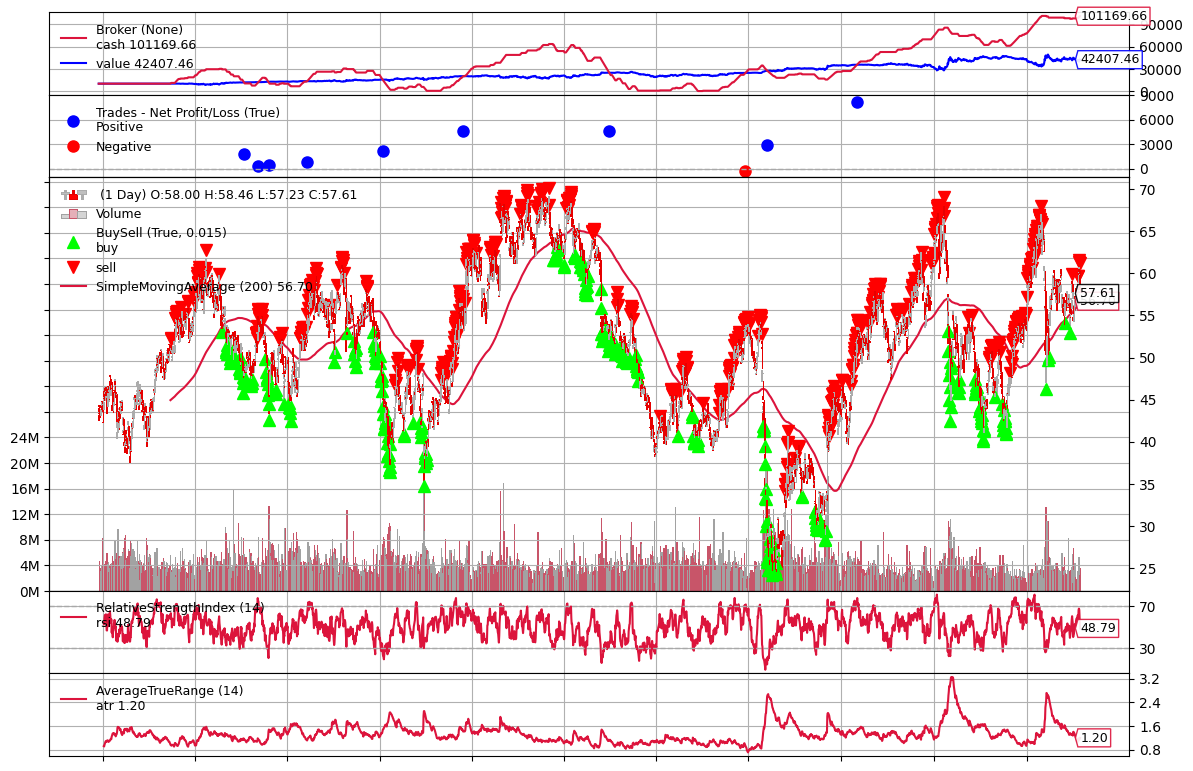

In [37]:
%matplotlib inline

plt.show()